# FAKE NEWS DETECTION

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

**Exploratory Data Analysis**

In [3]:
df=pd.read_csv("FNDdata.csv")

In [4]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [5]:
X=df.drop('label',axis=1)

In [6]:
y=df['label']

In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
df.shape

(20800, 5)

In [9]:
df["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

c:\users\muska\anaconda3\envs\tensorflow2\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TARGET DISTRIBUTION')

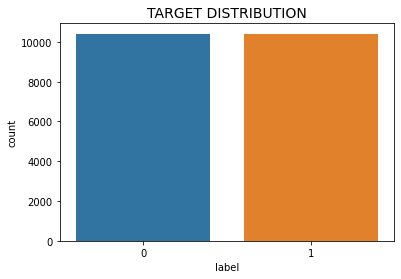

In [10]:
sns.countplot(df["label"])
plt.title("TARGET DISTRIBUTION",fontsize = 14)

In [11]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

**Data Preprocessing**

In [12]:
df=df.dropna()

In [13]:
df.shape

(18285, 5)

In [14]:
messages=df.copy()

In [15]:
messages.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [16]:
messages.reset_index(inplace=True)

In [17]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [18]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [19]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
import re
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
from tensorflow.keras.preprocessing.text import one_hot
voc_size = 5000
onehot = [one_hot(words,voc_size) for words in corpus]

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sent_length = 20
embedded_sent = pad_sequences(onehot,padding = "pre",maxlen=sent_length)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X_ml = cv.fit_transform(corpus).toarray()

In [20]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
#X_ml = cv.fit_transform(corpus).toarray()

In [21]:
X_ml.shape

(18285, 5000)

In [22]:
y_ml = messages['label']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ml, y_ml, test_size=0.33, random_state=0)

In [24]:
cv_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [25]:
cv_df.head(10)

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**MULTINOMIAL NB**

In [27]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()

In [35]:
from sklearn import metrics
import itertools

Accuracy:   0.902
Precision:   0.874
Confusion matrix, without normalization


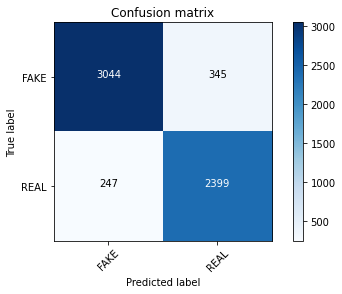

In [29]:
model1.fit(X_train, y_train)
pred = model1.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
score1 = metrics.precision_score(y_test, pred)
print("Precision:   %0.3f" % score1)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**MULTINOMIAL NAIVE BAYES WITH HYPERPARAMETERS**

In [30]:
model2 = MultinomialNB(alpha=0.1)

Accuracy:   0.902
Precision:   0.886
Confusion matrix, without normalization


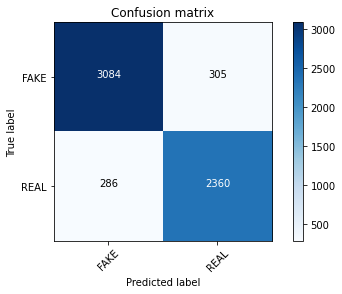

In [31]:
model2.fit(X_train, y_train)
pred = model2.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
score1 = metrics.precision_score(y_test, pred)
print("Precision:   %0.3f" % score1)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**PASSIVE AGGRESIVE CLASSIFIER**

In [32]:
from sklearn.linear_model import PassiveAggressiveClassifier
model3 = PassiveAggressiveClassifier()

Accuracy:   0.920
Precision:   0.903
Confusion matrix, without normalization


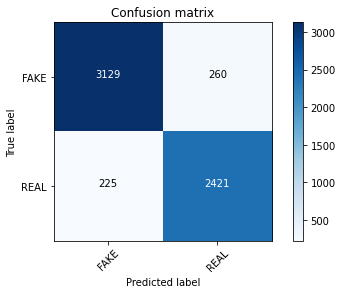

In [33]:
model3.fit(X_train, y_train)
pred = model3.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
score1 = metrics.precision_score(y_test, pred)
print("Precision:   %0.3f" % score1)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**LSTM**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [23]:
embedding_features = 40

In [24]:
model4 = Sequential()
model4.add(Embedding(voc_size,embedding_features,input_length = sent_length))
model4.add(LSTM(100))
model4.add(Dense(1,activation = "sigmoid"))

In [25]:
model4.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = "accuracy")

In [26]:
print(model4.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
y = df["label"]

In [28]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [29]:
X_lstm = np.array(embedded_sent) 
y_lstm = np.array(y)

In [30]:
X_lstm.shape,y_lstm.shape

((18285, 20), (18285,))

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.33, random_state=0)

In [32]:
model4.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 10, batch_size = 64)

Epoch 1/10
192/192 [==============================] - 8s 42ms/step - loss: 0.3368 - accuracy: 0.8438 - val_loss: 0.1971 - val_accuracy: 0.9152
Epoch 2/10
192/192 [==============================] - 7s 38ms/step - loss: 0.1427 - accuracy: 0.9428 - val_loss: 0.1960 - val_accuracy: 0.9176
Epoch 3/10
192/192 [==============================] - 7s 36ms/step - loss: 0.1018 - accuracy: 0.9631 - val_loss: 0.2336 - val_accuracy: 0.9167
Epoch 4/10
192/192 [==============================] - 7s 38ms/step - loss: 0.0777 - accuracy: 0.9728 - val_loss: 0.2402 - val_accuracy: 0.9135
Epoch 5/10
192/192 [==============================] - 7s 38ms/step - loss: 0.0588 - accuracy: 0.9804 - val_loss: 0.2589 - val_accuracy: 0.9104
Epoch 6/10
192/192 [==============================] - 7s 39ms/step - loss: 0.0386 - accuracy: 0.9876 - val_loss: 0.3442 - val_accuracy: 0.9133
Epoch 7/10
192/192 [==============================] - 7s 38ms/step - loss: 0.0252 - accuracy: 0.9935 - val_loss: 0.3638 - val_accuracy: 0.9097

Accuracy:   0.908
Precision:   0.894
Confusion matrix, without normalization


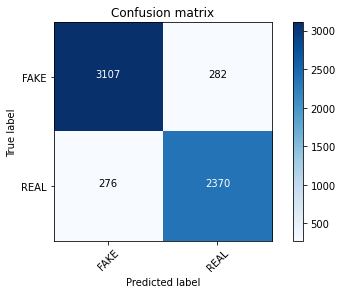

In [36]:
pred = model4.predict_classes(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
score1 = metrics.precision_score(y_test, pred)
print("Precision:   %0.3f" % score1)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**LSTM with dropout layer**

In [37]:
from tensorflow.keras.layers import Dropout
model5=Sequential()
model5.add(Embedding(voc_size,embedding_features,input_length=sent_length))
model5.add(Dropout(0.3))
model5.add(LSTM(100))
model5.add(Dropout(0.3))
model5.add(Dense(1,activation='sigmoid'))

In [38]:
model5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [39]:
model5.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 10, batch_size = 64)

Epoch 1/10
192/192 [==============================] - 8s 44ms/step - loss: 0.3438 - accuracy: 0.8401 - val_loss: 0.1941 - val_accuracy: 0.9155
Epoch 2/10
192/192 [==============================] - 8s 39ms/step - loss: 0.1499 - accuracy: 0.9424 - val_loss: 0.1899 - val_accuracy: 0.9221
Epoch 3/10
192/192 [==============================] - 7s 37ms/step - loss: 0.1107 - accuracy: 0.9606 - val_loss: 0.2145 - val_accuracy: 0.9175
Epoch 4/10
192/192 [==============================] - 8s 40ms/step - loss: 0.0852 - accuracy: 0.9713 - val_loss: 0.2200 - val_accuracy: 0.9171
Epoch 5/10
192/192 [==============================] - 8s 40ms/step - loss: 0.0690 - accuracy: 0.9776 - val_loss: 0.2593 - val_accuracy: 0.9162
Epoch 6/10
192/192 [==============================] - 7s 39ms/step - loss: 0.0483 - accuracy: 0.9851 - val_loss: 0.2873 - val_accuracy: 0.9183
Epoch 7/10
192/192 [==============================] - 8s 40ms/step - loss: 0.0326 - accuracy: 0.9900 - val_loss: 0.3437 - val_accuracy: 0.9122

Accuracy:   0.915
Precision:   0.887
Confusion matrix, without normalization


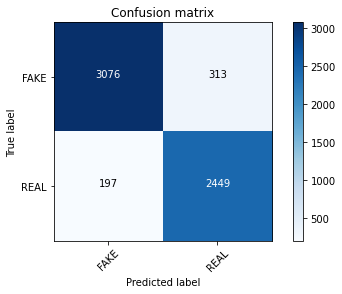

In [40]:
pred = model5.predict_classes(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
score1 = metrics.precision_score(y_test, pred)
print("Precision:   %0.3f" % score1)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**Bidirectional LSTM RNN**

In [41]:
from tensorflow.keras.layers import Bidirectional

In [42]:
model6 = Sequential()
model6.add(Embedding(voc_size,embedding_features,input_length = sent_length))
model6.add(Bidirectional(LSTM(100)))
model6.add(Dense(1,activation = "sigmoid"))

In [43]:
model6.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [44]:
model6.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 10, batch_size = 64)

Epoch 1/10
192/192 [==============================] - 9s 45ms/step - loss: 0.3195 - accuracy: 0.8465 - val_loss: 0.1986 - val_accuracy: 0.9123
Epoch 2/10
192/192 [==============================] - 7s 39ms/step - loss: 0.1449 - accuracy: 0.9432 - val_loss: 0.1924 - val_accuracy: 0.9210
Epoch 3/10
192/192 [==============================] - 8s 39ms/step - loss: 0.1052 - accuracy: 0.9651 - val_loss: 0.2158 - val_accuracy: 0.9147
Epoch 4/10
192/192 [==============================] - 8s 39ms/step - loss: 0.0754 - accuracy: 0.9773 - val_loss: 0.2880 - val_accuracy: 0.9158
Epoch 5/10
192/192 [==============================] - 8s 39ms/step - loss: 0.0576 - accuracy: 0.9818 - val_loss: 0.2995 - val_accuracy: 0.9123
Epoch 6/10
192/192 [==============================] - 8s 40ms/step - loss: 0.0415 - accuracy: 0.9877 - val_loss: 0.3435 - val_accuracy: 0.9070
Epoch 7/10
192/192 [==============================] - 7s 39ms/step - loss: 0.0266 - accuracy: 0.9927 - val_loss: 0.3521 - val_accuracy: 0.9135

Accuracy:   0.906
Precision:   0.893
Confusion matrix, without normalization


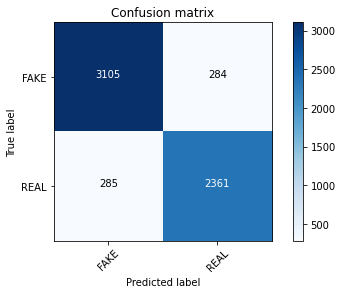

In [45]:
pred = model6.predict_classes(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
score1 = metrics.precision_score(y_test, pred)
print("Precision:   %0.3f" % score1)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

**Bidirectional LSTM RNN with dropout layer**

In [46]:
model7=Sequential()
model7.add(Embedding(voc_size,embedding_features,input_length=sent_length))
model7.add(Dropout(0.3))
model7.add(Bidirectional(LSTM(100)))
model7.add(Dropout(0.3))
model7.add(Dense(1,activation='sigmoid'))

In [47]:
model7.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [48]:
model7.fit(X_train,y_train,validation_data = (X_test,y_test), epochs = 10, batch_size = 64)

Epoch 1/10
192/192 [==============================] - 9s 49ms/step - loss: 0.3188 - accuracy: 0.8431 - val_loss: 0.2061 - val_accuracy: 0.9168
Epoch 2/10
192/192 [==============================] - 8s 41ms/step - loss: 0.1526 - accuracy: 0.9402 - val_loss: 0.1903 - val_accuracy: 0.9231
Epoch 3/10
192/192 [==============================] - 8s 41ms/step - loss: 0.1090 - accuracy: 0.9598 - val_loss: 0.2189 - val_accuracy: 0.9203
Epoch 4/10
192/192 [==============================] - 8s 41ms/step - loss: 0.0798 - accuracy: 0.9740 - val_loss: 0.2622 - val_accuracy: 0.9191
Epoch 5/10
192/192 [==============================] - 8s 41ms/step - loss: 0.0560 - accuracy: 0.9823 - val_loss: 0.3163 - val_accuracy: 0.9175
Epoch 6/10
192/192 [==============================] - 8s 41ms/step - loss: 0.0440 - accuracy: 0.9848 - val_loss: 0.3254 - val_accuracy: 0.9188
Epoch 7/10
192/192 [==============================] - 8s 41ms/step - loss: 0.0330 - accuracy: 0.9890 - val_loss: 0.3589 - val_accuracy: 0.9167

Accuracy:   0.909
Precision:   0.900
Confusion matrix, without normalization


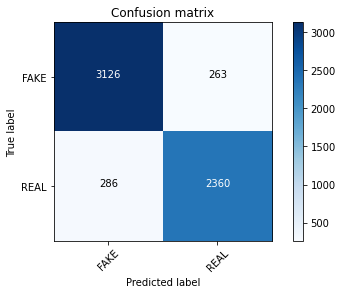

In [49]:
pred = model7.predict_classes(X_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)
score1 = metrics.precision_score(y_test, pred)
print("Precision:   %0.3f" % score1)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3389
           1       0.90      0.89      0.90      2646

    accuracy                           0.91      6035
   macro avg       0.91      0.91      0.91      6035
weighted avg       0.91      0.91      0.91      6035



**Model comparison**

COMPARISON ON BASIS OF ACCURACY SCORES

In [57]:
import pandas as pd

data_df = {'Model': ["Naive-Bayes","Naive-Bayes(hyperP)","PAC","LSTM","LSTM(dropout)","Bidir-LSTM","Bidir-LSTM(dropout)"],
        'Accuracy': [0.902,0.902,0.920,0.908,0.915,0.906,0.909]
        }

data_df = pd.DataFrame(data_df, columns = ['Model', 'Accuracy'],)

print (data_df)

                 Model  Accuracy
0          Naive-Bayes     0.902
1  Naive-Bayes(hyperP)     0.902
2                  PAC     0.920
3                 LSTM     0.908
4        LSTM(dropout)     0.915
5           Bidir-LSTM     0.906
6  Bidir-LSTM(dropout)     0.909


<AxesSubplot:title={'center':'Models'}, xlabel='Model-name', ylabel='Accuracy'>

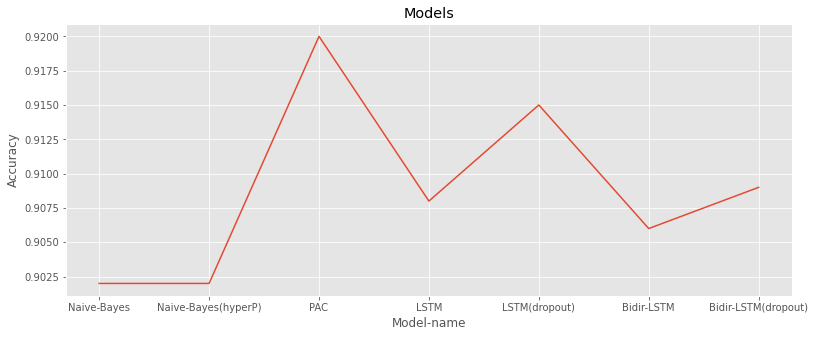

In [58]:
import seaborn as sns
plt.figure(figsize=(13,5))
plt.xlabel('Model-name')
plt.ylabel('Accuracy')
plt.title('Models')
sns.lineplot(x = data_df["Model"], y = data_df["Accuracy"])

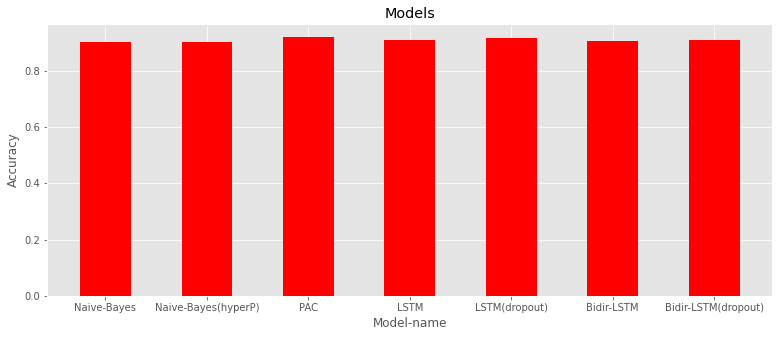

In [64]:
from matplotlib import style
style.use("ggplot")
x=["Naive-Bayes","Naive-Bayes(hyperP)","PAC","LSTM","LSTM(dropout)","Bidir-LSTM","Bidir-LSTM(dropout)"]
y=[0.902,0.902,0.920,0.908,0.915,0.906,0.909]
plt.figure(figsize=(13,5))
plt.bar(x,y,width=0.5,color="red")
plt.xlabel('Model-name')
plt.ylabel('Accuracy')
plt.title('Models')
plt.show()

COMPARISON ON BASIS OF PRECISION

In [60]:
data_df = {'Model': ["Naive-Bayes","Naive-Bayes(hyperP)","PAC","LSTM","LSTM(dropout)","Bidir-LSTM","Bidir-LSTM(dropout)"],
        'Precision': [0.874,0.886,0.903,0.894,0.887,0.893,0.900]
        }

data_df = pd.DataFrame(data_df, columns = ['Model', 'Precision'],)

print (data_df)

                 Model  Precision
0          Naive-Bayes      0.874
1  Naive-Bayes(hyperP)      0.886
2                  PAC      0.903
3                 LSTM      0.894
4        LSTM(dropout)      0.887
5           Bidir-LSTM      0.893
6  Bidir-LSTM(dropout)      0.900


<AxesSubplot:title={'center':'Models'}, xlabel='Model-name', ylabel='Precision'>

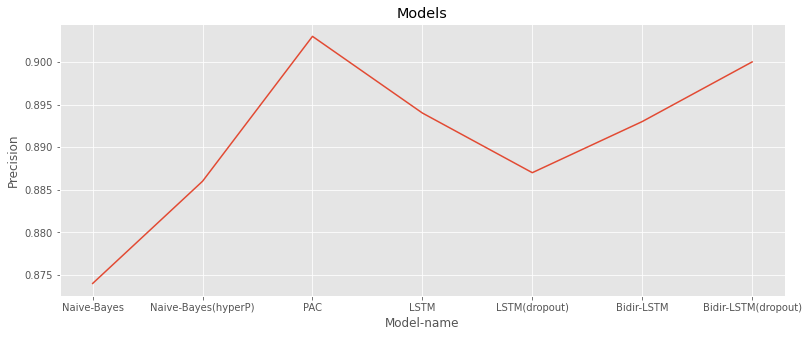

In [61]:
plt.figure(figsize=(13,5))
plt.xlabel('Model-name')
plt.ylabel('Precision')
plt.title('Models')
sns.lineplot(x = data_df["Model"], y = data_df["Precision"])

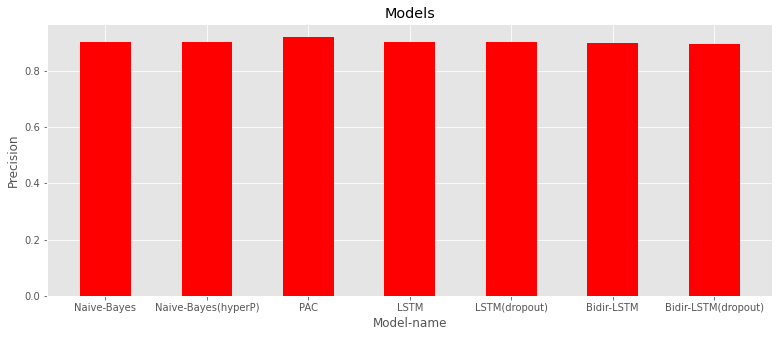

In [63]:
from matplotlib import style
style.use("ggplot")
x=["Naive-Bayes","Naive-Bayes(hyperP)","PAC","LSTM","LSTM(dropout)","Bidir-LSTM","Bidir-LSTM(dropout)"]
y=[0.902,0.902,0.920,0.903,0.902,0.897,0.894]
plt.figure(figsize=(13,5))
plt.bar(x,y,width=0.5,color="red")
plt.xlabel('Model-name')
plt.ylabel('Precision')
plt.title('Models')
plt.show()